In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
data = pd.read_csv(r'clustering.csv')

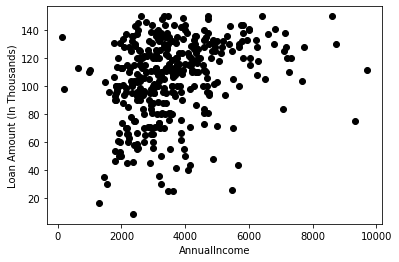

In [2]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

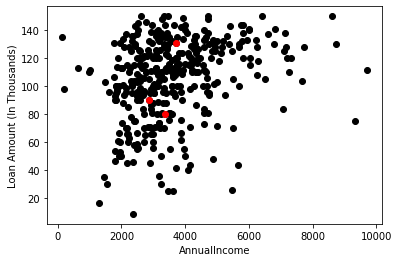

In [3]:
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [4]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

C:\Users\My PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\My PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


366.8701709839848
401.4665630299611
137.37630699362074
241.75650104316816
284.41335268050597
211.50041280045707
223.00303487546444
187.01068731505586
98.01161657776196
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


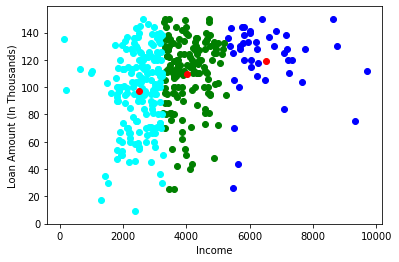

In [5]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [13]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
kmeans.inertia_

44886419.874992326

Text(0, 0.5, 'Inertia')

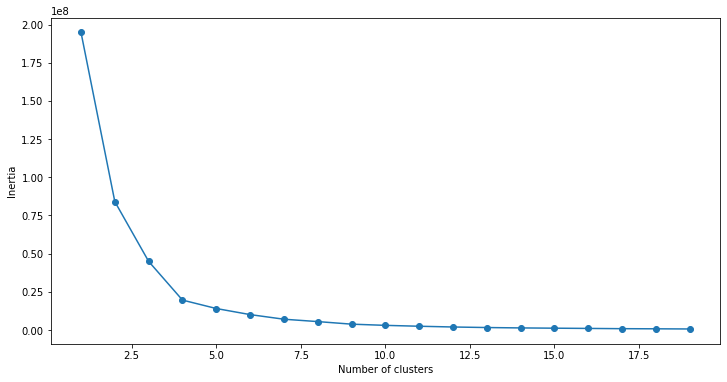

In [15]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [17]:
kmeans.fit(data)
pred = kmeans.predict(data)
pred

array([ 0, 13,  9,  7,  2, 12,  4, 13, 13, 18, 10,  7, 12, 12, 16, 13,  1,
       15,  6, 17,  2,  0,  7,  1, 11, 16,  2,  0,  2,  1, 12, 15,  5, 14,
       17, 17,  0,  5,  6,  6,  9, 10,  9,  7,  0, 12, 15, 16, 17, 12,  5,
        9,  1, 17, 16,  1, 13,  7,  2,  7,  8, 17,  0,  2,  7,  7,  2, 14,
       12, 13,  5, 14,  7, 18, 13, 18, 15,  9, 12,  7, 13, 15,  7,  5, 12,
       14, 10, 16, 14, 14,  2,  5, 16,  7,  2, 14, 18, 16,  7, 13, 15,  6,
       16,  0,  0,  2, 15, 18, 15,  9,  9, 13,  5, 15,  7,  0, 10, 14, 18,
        2,  1, 17, 17,  9,  0, 11,  7,  6, 12,  6, 14,  6, 16,  1,  9,  1,
        2, 14,  8,  6,  2, 14, 15,  5,  1, 16,  6, 13, 14,  3,  7, 17,  5,
       15, 17,  2,  6, 13, 14, 17, 17,  0,  2, 18,  6, 16,  7,  7, 15,  7,
       12, 12,  7,  1, 18,  9, 17,  6,  0,  0,  7, 14])